<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lab 10 - Sampling Distributions

---

## References

* [Sections 14.3 - 14.6 of the Textbook](https://ccsf-math-108.github.io/textbook/chapters/14/3/SD_and_the_Normal_Curve.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Code Reference](https://ccsf-math-108.github.io/materials-sp25/resources/code-reference.html)

---

## Lab Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your tasks are categorized as auto-graded (📍) and manually graded (📍🔎):
    - **For all auto-graded tasks:**
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to execute tests on your code.
        - There are no hidden auto-grader tests in the lab assignments. This means if you pass the tests, you can assume you've completed the task successfully.
    - **For all manually graded tasks:**
        - You may need to provide your own response to the provided prompt. Replace the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or another output using code. Replace the `...` in the code cell to generate the image, table, etc.
        - In either case, check your response with a classmate, a tutor, or the instructor before moving on.
- Throughout this assignment and all future ones, please **do not re-assign variables** throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you may fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- **Collaborating on labs is encouraged!** You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) However, please don't just share answers.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate "standard deviation" as "SD"). These two sample statistics can give us a bird's eye view of the distribution -- by letting us know where the distribution sits on the number line and how spread out it is, respectively.

First, load in the `births` table from lecture, which is a large random sample of US births and includes information about mother-child pairs.

In [ ]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


---

### Task 01 📍🔎

<!-- BEGIN QUESTION -->

Write a line of code to plot the distribution of mother's ages from the `births` table. Don't change the last line, which will plot the mean of the sample on the distribution itself.

**Note**: Since this task does not have an auto-grader, check your solution with a classmate, tutor, or the instructor before moving on.

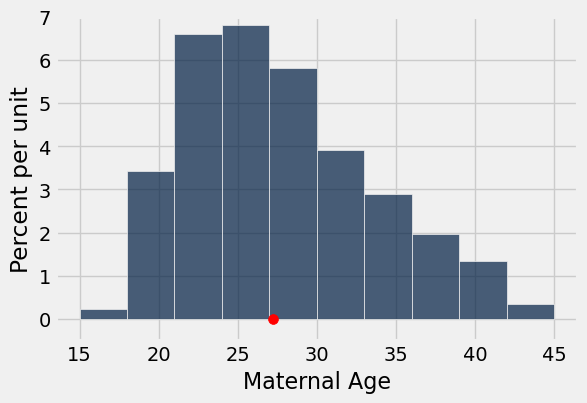

In [ ]:
births.select("Maternal Age").hist()
# Do not change anything below this line
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50);
plt.ylim(-0.005, 0.07);

<!-- END QUESTION -->

---

### Center of Gravity

In the plot above, we can see that the mean is the center of gravity (or balance point) of the distribution. If you imagine cutting the distribution out of cardboard and placing your finger below the mean (the red dot), the distribution would balance perfectly on your finger. Since the distribution is right-skewed (i.e., it has a long right tail), the mean of the distribution is larger than the median (the "halfway" point of the data). Conversely, if the distribution had been left-skewed, the mean would be smaller than the median.

---

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

Run the following cell to plot the mean (red) and median (blue) on the distribution of the mothers' ages. Then write a sentence describing the relationship between the mean and the median in this distribution.

**Note**: Since this task does not have an auto-grader, check your solution with a classmate, tutor, or the instructor before moving on.

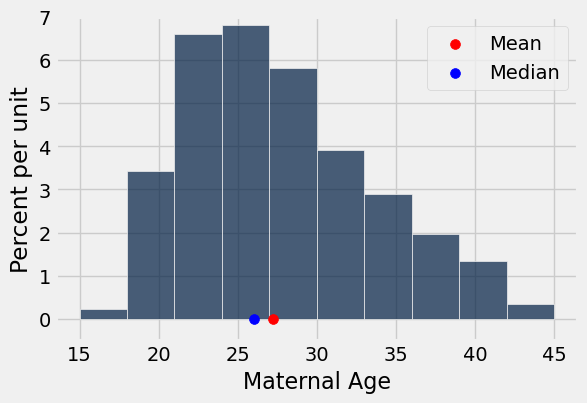

In [ ]:
births.hist("Maternal Age")
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(births.column("Maternal Age")), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.005, 0.07);

Since the distribution is right-skewed, the mean of the distribution is larger than the median

<!-- END QUESTION -->

---

### Standard Deviation

We are also interested in the standard deviation (SD) of mother's ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is larger, then this indicates that the mothers' ages are more spread out around the average than if the SD is smaller. A smaller SD would indicate a more tightly clustered distribution around the average mother's age.

**Recall that the SD of an array is defined as the "root mean square of the deviations", where the deviations are the difference between the original elements and their average.**

You can read more about Variability and SD in [Section 14.2](https://ccsf-math-108.github.io/textbook/chapters/14/2/Variability.html). This chapter also goes a bit more into detail about how "root mean square of the deviations" is calculated. Fun fact! $\sigma$ (Greek letter sigma) is used to represent the SD and $\mu$ (Greek letter mu) is used for the mean.

---

### Task 03 📍

Assign `age_mean` to the mean of the maternal ages and `age_sd` to the SD of the maternal ages. Then run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.

**Hint**: `np.std` might be useful here.

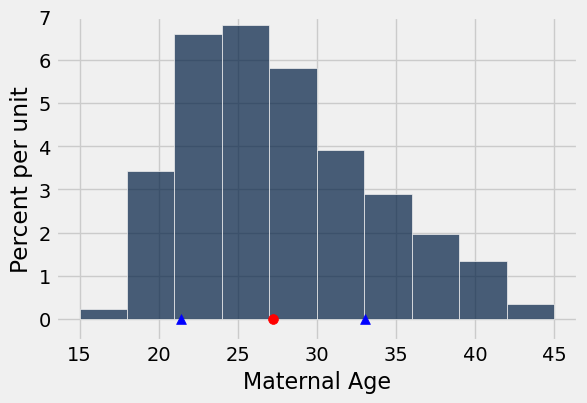

In [ ]:
age_mean = np.mean(births.column("Maternal Age"))
age_sd = np.std(births.column("Maternal Age"))
births.hist("Maternal Age")

plt.scatter(age_mean, 0, color='red', zorder=2, s=50);
plt.scatter(age_mean+age_sd, 0, marker='^', color='blue', zorder=2, s=50);
plt.scatter(age_mean-age_sd, 0, marker='^', color='blue', zorder=2, s=50);
plt.ylim(-0.005, 0.07);

In [ ]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: "✅ age_mean seems correct."

task_03 - 2 message: "✅ age_sd seems correct."

---

### Standard Deviations and Inflection Points

In the histogram above, the standard deviation is not easy to identify if you were just looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a **[normal distribution](https://ccsf-math-108.github.io/textbook/chapters/14/3/SD_and_the_Normal_Curve.html)**, the standard deviation is easily spotted using the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution.

---

### Task 04 📍

Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We'll plot the standard deviation on the histogram, as before. Notice where one standard deviation (blue) away from the mean (red) falls on the plot. Do you see the points of inflection?

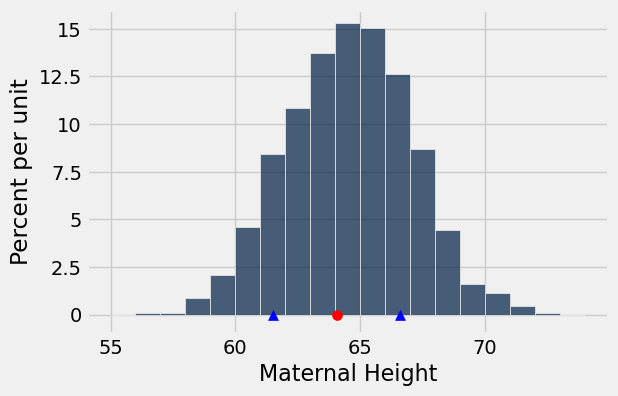

In [ ]:
height_mean = np.mean(births.column("Maternal Height"))
height_sd =  np.std(births.column("Maternal Height"))
births.hist("Maternal Height", bins=np.arange(55,75,1))

plt.scatter((height_mean), 0, color='red', zorder=2, s=50);
plt.scatter(height_mean+height_sd, 0, marker='^', color='blue', zorder=2, s=50);
plt.scatter(height_mean-height_sd, 0, marker='^', color='blue', zorder=2, s=50);
plt.ylim(-0.01, 0.16);

In [ ]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: "✅ height_mean seems correct."

task_04 - 2 message: "✅ height_sd seems correct."

---

### Central Limit Theorem

We don't always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the Central Limit Theorem (CLT) gives us distributions that always follow a normal distribution. The CLT says that distributions of both means and sums of large random samples drawn with replacement taken from a single distribution (regardless of the distribution's original shape) will be normally distributed. Remember that the CLT refers to the distribution of a statistic calculated from a distribution, not the distribution of the original sample or population. If this is confusing, ask a staff member!

The next section explores distributions of sample means and how the standard deviation of these distributions depends on sample size.

---

## Variability of the Sample Mean

By the [Central Limit Theorem](https://ccsf-math-108.github.io/textbook/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean or sum of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly.

In our simulations, we also noticed that the means of larger samples tended to be more tightly clustered around the mean of the distribution from which we sampled than those of smaller samples. Note that in this lab, the data we have access to and sample from is the population (which we rarely have access to), while when we bootstrap, the distribution we sample from is our original sample.

In this section, we will quantify the [variability of the sample mean](https://ccsf-math-108.github.io/textbook/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's look at the salaries of employees of the City of San Francisco in 2023. The median salary reported by the city government was about $169,361. **Note that in this lab, this dataset is the population.**

This data was collected by [Transparent California](https://transparentcalifornia.com/salaries/2023/san-francisco/) where the `salary` column is calculated by summing up regular, overtime, and other pay.

_Note: If you get stuck on any part of this lab, please refer to [Chapter 14 of the textbook](https://ccsf-math-108.github.io/textbook/chapters/14/Why_the_Mean_Matters.html)._

In [ ]:
salaries = Table.read_table('sf_salaries_2023.csv')
salaries.show(5)

salary
678381
653854
580333
565644
522043


In [ ]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of San Francisco city employees in 2023: ', salary_mean.round(2))

Mean salary of San Francisco city employees in 2023:  113394.16


In [ ]:
max(salaries.column(0))

678381.01000000001

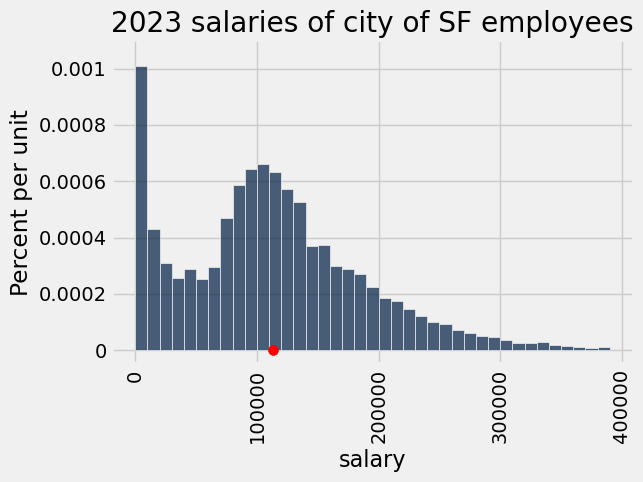

In [ ]:
salaries.hist('salary', bins=np.arange(0, 400000, 10000))
plt.scatter(salary_mean, 0, color='red', zorder=2, s=50)
plt.title('2023 salaries of city of SF employees')
plt.ylim(-0.0000005, 0.000011);

Clearly, the population _does not_ follow a Normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples **with replacement** and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

---

### Task 05 📍

Define a function `one_sample_mean`. Its arguments should be `table` (the name of a table), `label` (the label of the column containing the variable), and `sample_size`(the number of employees in the sample). It should sample with replacement from the table and
return the mean of the `label` column of the sample.

_Note:_ The function should reference the arguments and be able to work with any table.

In [ ]:
def one_sample_mean(table, label, sample_size):
    new_sample = table.sample(sample_size, with_replacement=True)
    new_sample_mean = np.mean(new_sample.column(label))
    return new_sample_mean

In [ ]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: "✅ one_sample_mean is callable."

task_05 - 2 message: "✅ one_sample_mean returns a number."

task_05 - 3 message: "✅ one_sample_mean seems to be working correctly."

---

### Task 06 📍

Use `one_sample_mean` to define a function `simulate_sample_mean`. The arguments are the name of the `table`, the `label` of the column containing the variable, the `sample_size`, and the number of simulations (`repetitions`).

The function should sample with replacement from the table and calculate the mean of each sample. It should save the sample means in an array called `means`. The remaining code in the function displays an empirical histogram of the sample means.

_Note:_ We round all values to 2 decimal places in the provided code because we are working with salaries.

In [ ]:
def simulate_sample_mean(table, label, sample_size, repetitions):

    means = make_array()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table, label, sample_size)
        means = np.append(means, round(new_sample_mean, 2))

    sample_means = Table().with_column('Sample Means', means)

    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size {sample_size}; {repetitions} Resamples'.format(sample_size=sample_size, repetitions=repetitions))
    print(f"Sample size: {sample_size}")
    print(f"Population mean: {np.mean(table.column(label)).round(2)}")
    print(f"Average of sample means: {np.mean(means).round(2)}")
    print(f"Population SD: {np.std(table.column(label)).round(2)}")
    print(f"SD of sample means: {np.std(means).round(2)}")
    return np.std(means)

In [ ]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: "✅ simulate_sample_mean is callable."

---

### Verify `simulate_sample_mean`

Verify with a peer, a tutor, or the instructor that you've implemented the function above correctly. If you haven't implemented it correctly, the rest of the lab won't work properly, so this step is crucial.  In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.

*Hint: You should see a distribution similar to something we've been talking about. If not, check your function.*

Sample size: 100
Population mean: 113394.16
Average of sample means: 113270.74
Population SD: 78501.6
SD of sample means: 7876.45


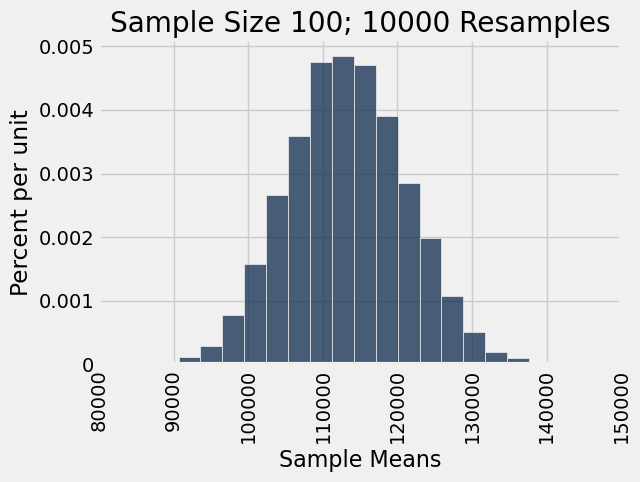

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(80000, 150000);

Notice that our distribution of *sample means* looks approximately normal! Did it matter if our original distribution was normally distributed?

---

### Task 07 📍🔎

<!-- BEGIN QUESTION -->

Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions.

**Notes:**
* Since this task does not have an auto-grader, check your solution with a classmate, tutor, or the instructor before moving on.
* You are not responsible for the `plt.xlim` or `plt.ylim` lines - they just make sure that all of the plt have the same x-axis and y-axis, respectively.


Sample size: 400
Population mean: 113394.16
Average of sample means: 113373.0
Population SD: 78501.6
SD of sample means: 3921.25


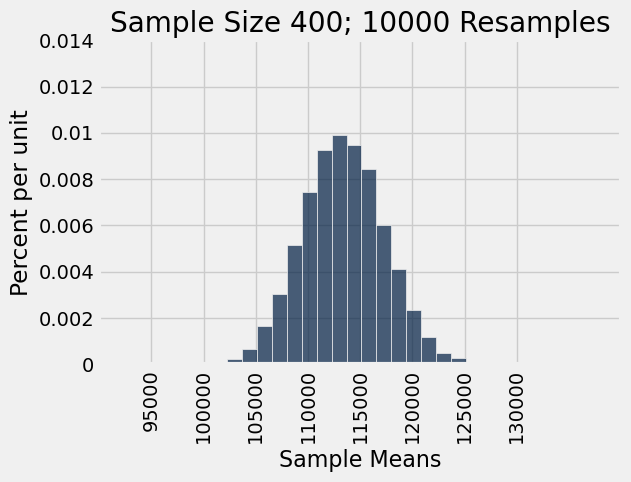



Sample size: 625
Population mean: 113394.16
Average of sample means: 113400.62
Population SD: 78501.6
SD of sample means: 3126.37


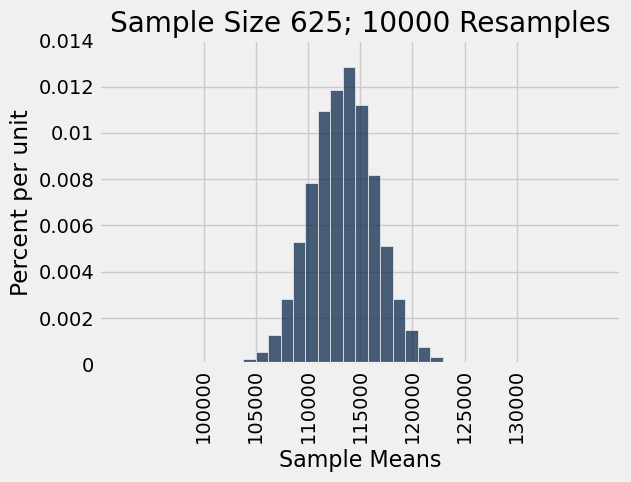

In [ ]:
simulate_sample_mean(salaries, 'salary', 400, 10000)
plt.xlim(90000, 140000)
plt.ylim(0, 0.00014)
plt.show();
print('\n')
simulate_sample_mean(salaries, 'salary', 625, 10000)
plt.xlim(90000, 140000)
plt.ylim(0, 0.00014)
plt.show();

<!-- END QUESTION -->

---

### Task 08 📍

Assign `task8` to an array of numbers corresponding to true statement(s) about the plots from [Task 07](#Task-07-📍🔎).

*Hint*: If a distribution is bell-shaped, what type of curve does it follow?

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.


In [ ]:
task8 = make_array(1,4)
task8

array([1, 4])

In [ ]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: "✅ task8 is assigned to an array"

task_08 - 2 message: "✅ task8 is assigned to an array of integers"

task_08 - 3 message: "✅ task8 is assigned to an array of integers between 1 and 5, inclusive."

task_08 - 4 message: "✅ You've assigned the correct values to task8."

---

### Task 09 📍

Assign `task9` to an array of numbers corresponding to true statement(s) about the plots from [Task 07](#Task-07-📍🔎).

1. Both plots in Task 07 are roughly centered around the population mean.
2. Both plots in Task 07 are roughly centered around the mean of a particular sample.
3. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
4. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.

In [ ]:
task9 = make_array(1, 3)
task9

array([1, 3])

In [ ]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: "✅ task9 is assigned to an array"

task_09 - 2 message: "✅ task9 is assigned to an array of integers"

task_09 - 3 message: "✅ task9 is assigned to an array of integers between 1 and 4, inclusive."

task_09 - 4 message: "✅ You've assigned the correct values to task9."

---

### Increasing Number of Resamples

Below, we'll look at what happens when we take an **increasing number of resamples of a fixed sample size.** Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?

Sample size: 100
Population mean: 113394.16
Average of sample means: 113703.44
Population SD: 78501.6
SD of sample means: 7805.38


(0.0, 6e-05)

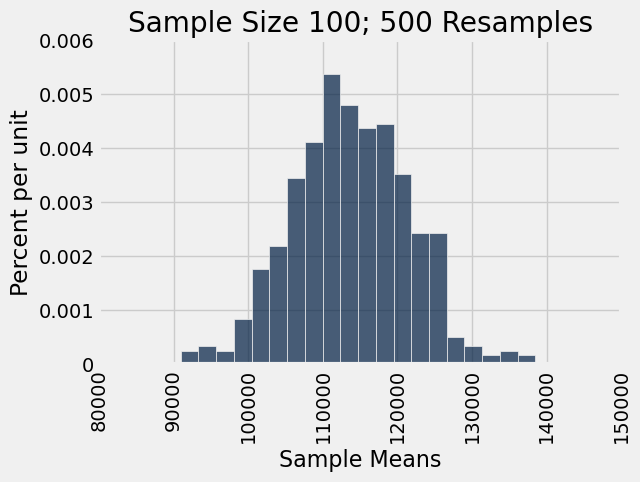

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plt.xlim(80000, 150000)
plt.ylim(0, 0.00006)

Sample size: 100
Population mean: 113394.16
Average of sample means: 113335.79
Population SD: 78501.6
SD of sample means: 7819.78


(0.0, 6e-05)

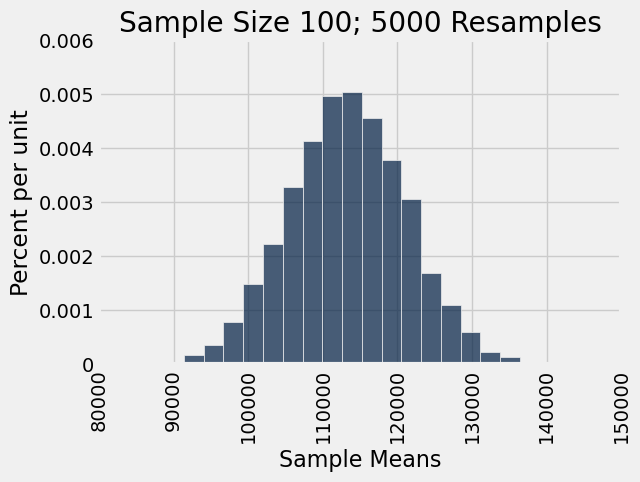

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plt.xlim(80000, 150000)
plt.ylim(0, 0.00006)

Sample size: 100
Population mean: 113394.16
Average of sample means: 113357.19
Population SD: 78501.6
SD of sample means: 7753.19


(0.0, 6e-05)

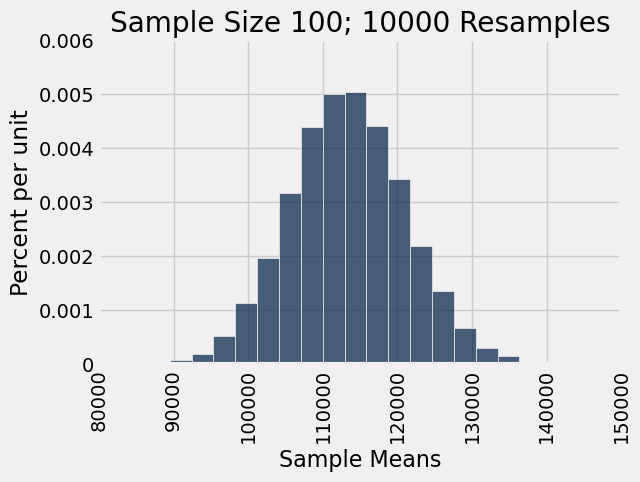

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(80000, 150000)
plt.ylim(0, 0.00006)

---

### Task 10 📍🔎

<!-- BEGIN QUESTION -->

What did you notice about the distributions of sample means in the four histograms above? Discuss with a peer, a tutor, or your instructor before moving on.

Sample size is the same across all three (100), so the spread stays about the same in all.When the sample size increases then the spread gets narrower.
But as the number of repetitions increases, the histograms become smoother and more bell-shaped.

<!-- END QUESTION -->

---

### Task 11 📍

Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of _resamples_ that I take, for a _fixed_ sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widely

In [ ]:
SD_of_sample_means = 3
SD_of_sample_means

3

In [ ]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: "✅ You've assigned SD_of_sample_means to an integer."

task_11 - 2 message: "✅ You've assigned SD_of_sample_means to an integer from 1, 2, 3, 4."

task_11 - 3 message: "✅ You've assigned the correct values to SD_of_sample_means."

---

### Increasing Sample Size

### Task 12 📍

Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.

**Hints**:
* The sample SD is different from the SD of the sample means.
* [Section 14.5](https://ccsf-math-108.github.io/textbook/chapters/14/5/Variability_of_the_Sample_Mean.html) might be helpful for answering this question.

In [ ]:
pop_vs_sample = make_array(3,4)
pop_vs_sample

array([3, 4])

In [ ]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: "✅ pop_vs_sample is assigned to an array"

task_12 - 2 message: "✅ pop_vs_sample is assigned to an array of integers"

task_12 - 3 message: "✅ pop_vs_sample is assigned to an array of integers between 1 and 6, inclusive."

task_12 - 4 message: "✅ You've assigned the correct values to pop_vs_sample."

---

### Task 13 📍

Is there a relationship between the sample size and the standard deviation of the sample means? Assign `task13` to the number corresponding to the statement that answers this question.

1. The SD of the sample means is inversely proportional to the square root of sample size.
2. The SD of the sample means is directly proportional to the square root of sample size.

_Hint:_ [Chapter 14.5](https://ccsf-math-108.github.io/textbook/chapters/14/5/Variability_of_the_Sample_Mean.html) of the textbook may be helpful.

In [ ]:
task13 = 1
task13

1

In [ ]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: "✅ You've assigned task13 to an integer."

task_13 - 2 message: "✅ You've assigned task13 to the integer 1 or 2."

task_13 - 3 message: "✅ You've assigned the correct values to task13."

---

### Bootstrap Samples

**Throughout this lab, we have been taking many random samples from a population** (in contrast to re-sampling from a sample). However, all of these principles hold for bootstrapped resamples from a single sample. The bootstrap works because it's like drawing from the original population, assuming the sample is representative. If your original sample is relatively large, all of your resamples will also be relatively large, and so the SD of resampled means will be relatively small.

It is also important to keep in mind that when doing the bootstrap, our histogram of resample means will be centered around the **original sample mean**, rather than the population mean (as we usually don't have access to the population mean)!

**In order to change the variability of your sample mean, you'd have to change the size of the original sample from which you are taking bootstrapped resamples.**

---

## Submit Your Assignment to Canvas

Follow these steps to submit your lab assignment:

1. **Check the Assignment Completion Requirements:** This assignment is scored as Complete or Incomplete. Make sure to check with your instructor about their requirements for a Complete score.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download HTML` to download the HTML version (`.html`) of this notebook.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.html` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

task_03 results: All test cases passed!
task_03 - 1 message: "✅ age_mean seems correct."

task_03 - 2 message: "✅ age_sd seems correct."


task_04 results: All test cases passed!
task_04 - 1 message: "✅ height_mean seems correct."

task_04 - 2 message: "✅ height_sd seems correct."


task_05 results: All test cases passed!
task_05 - 1 message: "✅ one_sample_mean is callable."

task_05 - 2 message: "✅ one_sample_mean returns a number."

task_05 - 3 message: "✅ one_sample_mean seems to be working correctly."


task_06 results: All test cases passed!
task_06 - 1 message: "✅ simulate_sample_mean is callable."


task_08 results: All test cases passed!
task_08 - 1 message: "✅ task8 is assigned to an array"

task_08 - 2 message: "✅ task8 is assigned to an array of integers"

task_08 - 3 message: "✅ task8 is assigned to an array of integers between 1 and 5, inclusive."

task_08 - 4 message: "✅ You've assigned the correct values to task8."


task_09 results: All test cases passed!
task_09 - 1 me